In [1]:
import yfinance as yf
import pandas as pd
import finance_calculator as fc
import numpy as np
import pyfolio as pf
import empyrical as em
import datapackage as dp
import requests
import bs4 as bs


Bad key savefig.frameon in file C:\Users\Curtis\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\Users\Curtis\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file C:\Users\Curtis\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You pro

In [2]:
# 
resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
soup = bs.BeautifulSoup(resp.text, 'lxml')
table = soup.find('table', {'class': 'wikitable sortable'})

In [3]:
tickers = []
date_first_added = []
for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        #fourth element is the sector
        
        
        tickers.append(ticker)
     

In [4]:
#We can get rid of the n at the of the ticker by using map, lambda and strip:
tickers = list(map(lambda s: s.strip(), tickers))

In [5]:
date_first_added = []

for row in table.findAll('tr')[1:]:
        date = row.findAll('td')[6].text
        
        date_first_added.append(date)


In [6]:
ticker_df = pd.DataFrame(tickers, columns=['ticker'])
date_first_added_df = pd.DataFrame(date_first_added, columns=['date first added'])

ticker_date_df = pd.concat([ticker_df, date_first_added_df], axis=1,)

ticker_date_df.head()

ticker date first added
0    MMM       1976-08-09
1    ABT       1964-03-31
2   ABBV       2012-12-31
3   ABMD       2018-05-31
4    ACN       2011-07-06

In [7]:
#isolate comapanies with data dating back to at least Jan 1st 2018 using loc and conditional statement
random_stock_pool = ticker_date_df.loc[ticker_date_df['date first added'] < '2018-01-01']
random_stock_pool.reset_index(inplace=True)
random_stock_pool

index ticker date first added
0        0    MMM       1976-08-09
1        1    ABT       1964-03-31
2        2   ABBV       2012-12-31
3        4    ACN       2011-07-06
4        5   ATVI       2015-08-31
..     ...    ...              ...
430    499    XYL       2011-11-01
431    500    YUM       1997-10-06
432    502    ZBH       2001-08-07
433    503   ZION       2001-06-22
434    504    ZTS       2013-06-21

[435 rows x 3 columns]

In [8]:
random_stock_pool_tickers = random_stock_pool['ticker']
random_stock_pool_tickers.count()

435

In [9]:
# Market Index Informations and pull their historical closing price since January 2018
start = "2018-01-01"
sp500 = yf.Ticker("^GSPC")
sp500_data = sp500.history(start= start, actions=False)
sp500_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)

In [ ]:
for i in range(1)

In [10]:
#generate 10 random integers from 0 - 499 to serve as our randomly created portfolio
high = random_stock_pool_tickers.count()
index_numbers = np.random.randint(low=0, high=high, size=10)
print(index_numbers)

[209  31 138 391 418 180 183 234 138 327]


In [11]:
#isloate ticker symbols using loc function
random_portfolio_tickers = random_stock_pool_tickers.loc[index_numbers].reset_index()
random_portfolio_tickers

index ticker
0    209    HWM
1     31    AMP
2    138    DUK
3    391    USB
4    418    WFC
5    180    GPS
6    183     GD
7    234    JPM
8    138    DUK
9    327    PPL

In [12]:

# pull data for 10 randomly genereated stocks 
random_stock_0 = yf.Ticker(random_portfolio_tickers["ticker"][0])
random_stock_1 = yf.Ticker(random_portfolio_tickers["ticker"][1])
random_stock_2 = yf.Ticker(random_portfolio_tickers["ticker"][2])
random_stock_3 = yf.Ticker(random_portfolio_tickers["ticker"][3])
random_stock_4 = yf.Ticker(random_portfolio_tickers["ticker"][4])
random_stock_5 = yf.Ticker(random_portfolio_tickers["ticker"][5])
random_stock_6 = yf.Ticker(random_portfolio_tickers["ticker"][6])
random_stock_7 = yf.Ticker(random_portfolio_tickers["ticker"][7])
random_stock_8 = yf.Ticker(random_portfolio_tickers["ticker"][8])
random_stock_9 = yf.Ticker(random_portfolio_tickers["ticker"][9])

random_stock_0_data = random_stock_0.history(start = start, actions =False)
random_stock_1_data = random_stock_1.history(start = start, actions =False)
random_stock_2_data = random_stock_2.history(start = start, actions =False)
random_stock_3_data = random_stock_3.history(start = start, actions =False)
random_stock_4_data = random_stock_4.history(start = start, actions =False)
random_stock_5_data = random_stock_5.history(start = start, actions =False)
random_stock_6_data = random_stock_6.history(start = start, actions =False)
random_stock_7_data = random_stock_7.history(start = start, actions =False)
random_stock_8_data = random_stock_8.history(start = start, actions =False)
random_stock_9_data = random_stock_9.history(start = start, actions =False)

random_stock_0_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
random_stock_1_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
random_stock_2_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
random_stock_3_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
random_stock_4_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
random_stock_5_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
random_stock_6_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
random_stock_7_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
random_stock_8_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
random_stock_9_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)

#Combine into single df
random_portfolio = pd.concat([random_stock_0_data, 
           random_stock_1_data, 
           random_stock_2_data, 
           random_stock_3_data, 
           random_stock_4_data, 
           random_stock_5_data, 
           random_stock_6_data, 
           random_stock_7_data, 
           random_stock_8_data, 
           random_stock_9_data], 
           axis="columns", join="inner").reset_index()

random_portfolio.set_index('Date', inplace=True)


In [13]:
daily_returns = random_portfolio.pct_change()
daily_returns

Close     Close     Close     Close     Close     Close  \
Date                                                                     
2018-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
2018-01-03  0.007925 -0.004944 -0.003124  0.009809  0.007694 -0.020667   
2018-01-04  0.047891  0.003667 -0.007834  0.007698  0.012508 -0.012963   
2018-01-05  0.009891  0.003418 -0.004616  0.006184  0.006738 -0.005803   
2018-01-08  0.005066  0.010160  0.003173  0.001446 -0.011315 -0.007681   
...              ...       ...       ...       ...       ...       ...   
2021-09-27  0.046622  0.022845 -0.008430  0.021910 -0.007512  0.028022   
2021-09-28 -0.017879 -0.023235 -0.005941 -0.011129 -0.034483  0.000814   
2021-09-29 -0.015427 -0.001623  0.013292  0.005003  0.024172  0.003252   
2021-09-30 -0.022250 -0.024343 -0.007627 -0.013608 -0.013183 -0.080227   
2021-10-01  0.039423  0.016697  0.008915  0.022207  0.013144  0.038326   

               Close     Close     Close     Close  
Date                                                
2018-01-02       NaN       NaN       NaN       NaN  
2018-01-03  0.006235  0.001019 -0.003124  0.002288  
2018-01-04  0.017200  0.014326 -0.007834  0.002608  
2018-01-05 -0.002485 -0.006420 -0.004616  0.006504  
2018-01-08  0.000000  0.001477  0.003173  0.014539  
...              ...       ...       ...       ...  
2021-09-27  0.001722  0.024166 -0.008430 -0.002111  
2021-09-28 -0.003337 -0.005390 -0.005941 -0.004937  
2021-09-29  0.006545 -0.000783  0.013292  0.008859  
2021-09-30 -0.011896 -0.013619 -0.007627 -0.020724  
2021-10-01  0.011172  0.021015  0.008915  0.002869  

[945 rows x 10 columns]

In [14]:
# calculate daily returns of portfolio assuming equal with (0.1) into each stock
weights = [.1,.1,.1,.1,.1,.1,.1,.1,.1,.1]

random_portfolio_returns = daily_returns.dot(weights)
random_portfolio_returns.head()

Date
2018-01-02         NaN
2018-01-03    0.000311
2018-01-04    0.007727
2018-01-05    0.000879
2018-01-08    0.002004
dtype: float64

In [15]:
# calucluate daily returnsd of S&P 500 then join with random portfolio returns

sp_daily_returns = sp500_data.pct_change()

sp_vs_random_returns = pd.concat([random_portfolio_returns, sp_daily_returns], axis="columns", join="inner")
sp_vs_random_return_columns = ["Random Portfolio","S&P 500"]
sp_vs_random_returns.columns=(sp_vs_random_return_columns)

<AxesSubplot:xlabel='Date'>

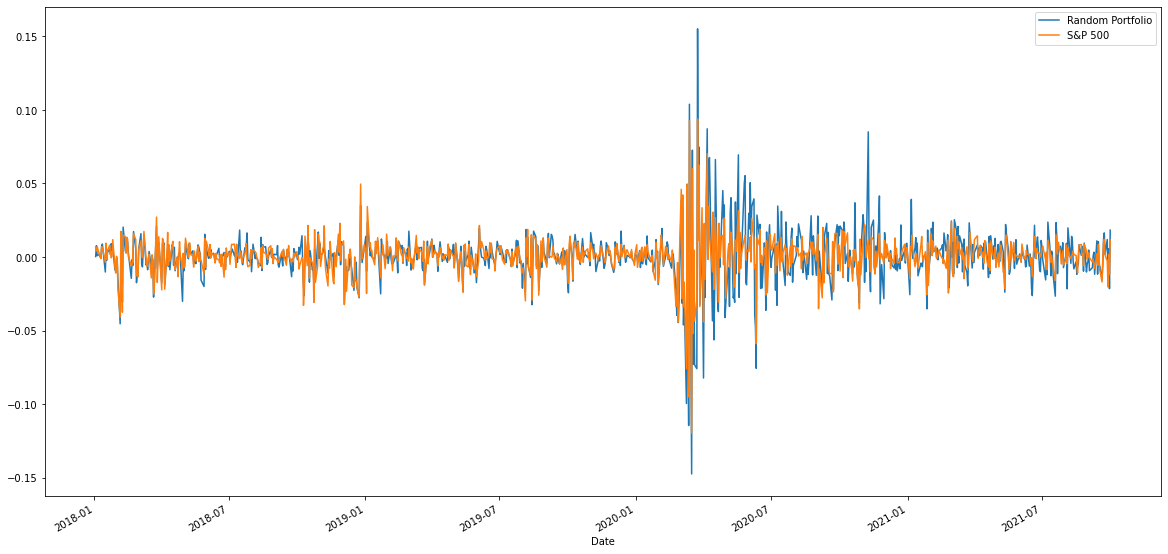

In [16]:
sp_vs_random_returns.plot(figsize = (20, 10))

In [17]:
growth_of_10k = 10000 * ((1+ sp_vs_random_returns).cumprod())

<AxesSubplot:xlabel='Date'>

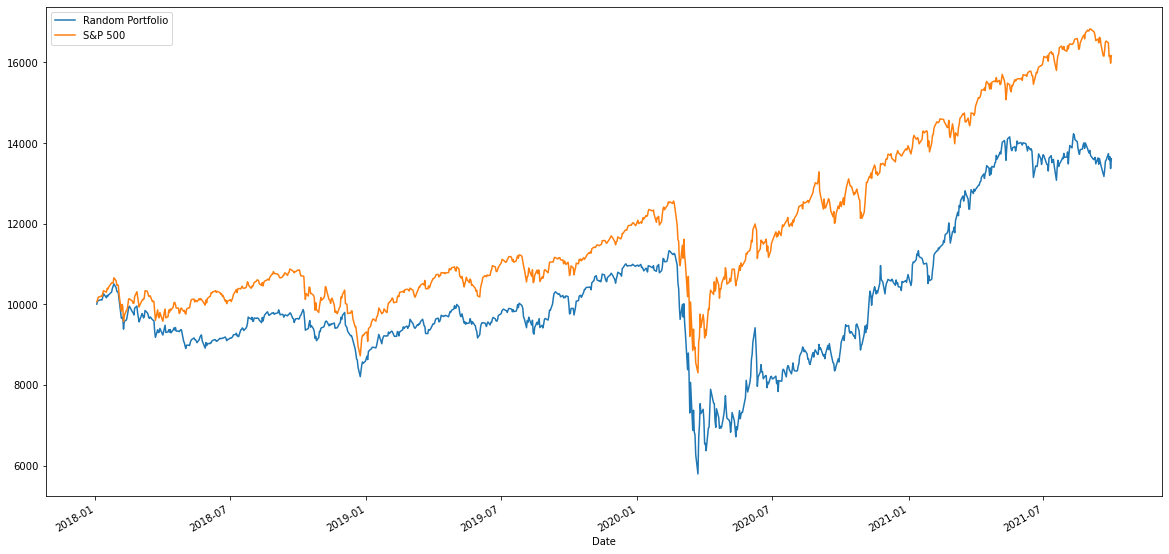

In [18]:
growth_of_10k.plot(figsize=(20,10))

In [19]:
#determine if the random portfolio outperformed
growth_of_10k_reset = growth_of_10k.reset_index()
index_for_comparison = growth_of_10k_reset['S&P 500'].count()
current_value_random = growth_of_10k_reset["Random Portfolio"][index_for_comparison]
current_value_sp_500 = growth_of_10k_reset["S&P 500"][index_for_comparison]

In [20]:
current_value_sp_500

16162.266422194883

In [21]:
current_value_sp_500

16162.266422194883

In [23]:
if current_value_random > current_value_sp_500:
    print("the random portfolio outperformed the index!")
    
elif current_value_random == current_value_sp_500:
    print("the random portfolio performed the same as the index.")
        
elif current_value_random < current_value_sp_500:
     print("the random portfolio underperformed the index")

the random portfolio underperformed the index
